# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Implementation with StatsForecast](#4)
5. [Conclusion](#5)
6. [References](6)

<a id="1"></a> 
# **Introduction**

Time series modeling applied to forecasting the evolution of the Moroccan population by age and sex is a crucial approach to understanding and forecasting demographic changes in the country during a specific time period, in this case, from 1995 to 2011. This methodology allows you to analyze past trends, identify seasonal patterns and make future projections based on historical data.

The evolution of the Moroccan population by age and sex is a topic of great importance for the planning and socioeconomic development of the country. Understanding how different age cohorts and gender groups have behaved over time provides valuable information for public policy formulation, resource allocation, and implementation of social programs.

Time series analysis makes it possible to examine demographic dynamics and understand how the structure of the Moroccan population has changed depending on factors such as birth rate, mortality and migration. Additionally, it can reveal specific patterns related to population aging, gender distribution, and other relevant demographic aspects.

By applying time series modeling techniques, such as the ARIMA (Seasonal Autoregressive Integrated Moving Average) model, it is possible to capture long-term trends, seasonal patterns and random fluctuations in the evolution of the Moroccan population by age and sex.

The main objective of this study is to develop an accurate model that allows forecasting the future evolution of the Moroccan population by age and sex. These forecasts are essential to make informed decisions related to the planning of health services, education, housing and other important aspects for the well-being of the population.

In summary, time series modeling applied to forecasting the evolution of the Moroccan population by age and sex provides a powerful tool to understand past demographic changes, identify patterns and trends, and make future projections. This is essential for informed decision-making and effective planning in critical areas such as health, education and socio-economic development in Morocco.

<a id="2"></a>
# **Case study**

In this case study, we will apply time series modeling techniques to forecast the evolution of the Moroccan population by age and sex during the period from 1995 to 2011. The main objective is to develop an accurate model that allows projecting the future demographic distribution , which will be essential for the planning of public policies, the design of social programs and the allocation of adequate resources.

We are going to use different analysis and forecasting techniques:

1. Data collection and analysis.
2. Data preparation.
3. Model selection.
4. Model adjustment.
5. Forecast and analysis of results.

Time series modeling applied to the forecast of the evolution of the Moroccan population by age and sex offers a powerful tool for planning and decision-making in the demographic field. The results obtained will allow government authorities and those responsible for social policies to make informed decisions in areas such as health, education, social security and resource allocation. The accuracy of the forecasts will depend on the quality of the data, the choice of the model and the adequacy of the parameters, so it is essential to carry out a rigorous analysis and adequate validation of the selected model.

## Importing Libraries

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': "yellowgreen",  # #212946  '#99FFDE', '#ffde99', '#de99ff'
    'axes.facecolor': 'yellowgreen',
    'savefig.facecolor': 'yellowgreen',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': 'black',  #2A3459
    'grid.linewidth': '1',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **Import data**


Evolution of the Moroccan population by age and gender from 1995 to 2011.

There are two sheets one for Male population and the other one for Female population.

Each sheet contains population count by age-band for each year from 1995 to 2011. We can get the data [here](https://github.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/blob/main/Data/population-by-age-and-gender-hcp-2014.xls)

In [47]:
#Import Population Data 
Global_Pop = pd.read_excel("../tutorial/population-by-age-and-gender-hcp-2014.xls")
#Male Population by age band
Male_Pop = pd.read_excel("../tutorial/population-by-age-and-gender-hcp-2014.xls", sheet_name="Male")
#Female Population by age band
Female_Pop = pd.read_excel("../tutorial/population-by-age-and-gender-hcp-2014.xls", sheet_name="Female")

Male_Pop.head()

,Year,Age band 0-4,Age band 5-9,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
0,1995,1577000,1649000,1632000,1444000,1282000,1017000,927000,826000,692000,440000,373000,330000,328000,223000,171000,216000
1,1996,1550000,1645000,1643000,1488000,1312000,1069000,931000,851000,722000,488000,369000,337000,322000,245000,164000,221000
2,1997,1529000,1636000,1647000,1534000,1337000,1129000,934000,875000,746000,543000,367000,345000,315000,266000,160000,225000
3,1998,1517000,1620000,1647000,1574000,1364000,1186000,945000,896000,768000,596000,374000,353000,308000,283000,162000,226000
4,1999,1521000,1588000,1646000,1605000,1397000,1235000,970000,911000,791000,642000,393000,357000,305000,293000,170000,225000


In [41]:
Female_Pop.head()

,Year,Age band 0-4,Age band 5-9,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
0,1995,1522000,1588000,1596000,1460000,1317000,1096000,1029000,813000,659000,447000,448000,343000,348000,210000,178000,205000
1,1996,1495000,1582000,1600000,1495000,1345000,1138000,1035000,865000,683000,486000,435000,369000,337000,244000,162000,220000
2,1997,1473000,1574000,1598000,1529000,1369000,1187000,1036000,920000,703000,534000,418000,399000,323000,278000,151000,230000
3,1998,1459000,1560000,1594000,1558000,1394000,1234000,1042000,967000,728000,581000,409000,424000,314000,307000,149000,236000
4,1999,1458000,1534000,1589000,1579000,1422000,1276000,1059000,1002000,761000,621000,415000,437000,315000,324000,159000,238000


**We have 16 age-band columns and one year column. First year is 1995 and last year is 2011.**

## **Check for Missing Values**

In [4]:
#Counting the proportion of missing values in Male Data
Male_missing = 100*(Male_Pop.isnull().sum())/len(Male_Pop)

#Counting the proportion of missing values in Female Data
Female_missing = 100*(Female_Pop.isnull().sum())/len(Female_Pop)

print("Summary of Male Data missing values : ")
print(Male_missing)
print("\nSummary of Female Data missing values : ")
print(Female_missing)

Summary of Male Data missing values : 
Year              0.0
Age band 0-4      0.0
Age band 5-9      0.0
Age band 10-14    0.0
Age band 15-19    0.0
Age band 20-24    0.0
Age band 25-29    0.0
Age band 30-34    0.0
Age band 35-39    0.0
Age band 40-44    0.0
Age band 45-49    0.0
Age band 50-54    0.0
Age band 55-59    0.0
Age band 60-64    0.0
Age band 65-69    0.0
Age band 70-74    0.0
Age band 75+      0.0
dtype: float64

Summary of Female Data missing values : 
Year              0.0
Age band 0-4      0.0
Age band 5-9      0.0
Age band 10-14    0.0
Age band 15-19    0.0
Age band 20-24    0.0
Age band 25-29    0.0
Age band 30-34    0.0
Age band 35-39    0.0
Age band 40-44    0.0
Age band 45-49    0.0
Age band 50-54    0.0
Age band 55-59    0.0
Age band 60-64    0.0
Age band 65-69    0.0
Age band 70-74    0.0
Age band 75+      0.0
dtype: float64


**We found no missing values.**

<a id="3"></a>
# **Explore Data with the plot method**

### **Population Pyramid of Training data**

**We will try to build a representation of the Moroccan population pyramids for the years 1995 and 2011.**

In [5]:
#Count the number of age bands
age_band_len = len(Male_Pop.columns)-1

#Construct a vector containing age bands || Age bands are similar for Male and Female Data
age_band = [i for i in range(age_band_len)]
for i in range(age_band_len):
    age_band[i] = Male_Pop.columns[1:][i]
        
print(age_band)

['Age band 0-4', 'Age band 5-9', 'Age band 10-14', 'Age band 15-19', 'Age band 20-24', 'Age band 25-29', 'Age band 30-34', 'Age band 35-39', 'Age band 40-44', 'Age band 45-49', 'Age band 50-54', 'Age band 55-59', 'Age band 60-64', 'Age band 65-69', 'Age band 70-74', 'Age band 75+']


## **Year 1995:**

In [43]:
#construct distribution vector for Male Population for 1995
male_1995 = [round((value / sum(Male_Pop.iloc[0][1:])) * 100,2) for value in Male_Pop.iloc[0][1:]]
print(sum(male_1995))

#construct distribution vector for Female Population for 1995
female_1995 = [round((value / sum(Female_Pop.iloc[0][1:])) * 100,2) for value in Female_Pop.iloc[0][1:]]
print(sum(female_1995))

#join age_band with male and female distribution for the year 1995
population_1995 = pd.DataFrame({"Age": age_band, "Male": male_1995, "Female": female_1995})

#Manipulating Data for Pyramid construction
population_1995["Female_Left"] = 0
population_1995["Female_Width"] = population_1995["Female"]

population_1995["Male_Left"] = -population_1995["Male"]
population_1995["Male_Width"] = population_1995["Male"]

population_1995.head()

99.99000000000001
100.0


,Age,Male,Female,Female_Left,Female_Width,Male_Left,Male_Width
0,Age band 0-4,12.01,11.48,0,11.48,-12.01,12.01
1,Age band 5-9,12.56,11.98,0,11.98,-12.56,12.56
2,Age band 10-14,12.43,12.04,0,12.04,-12.43,12.43
3,Age band 15-19,11.00,11.01,0,11.01,-11.00,11.00
4,Age band 20-24,9.77,9.93,0,9.93,-9.77,9.77


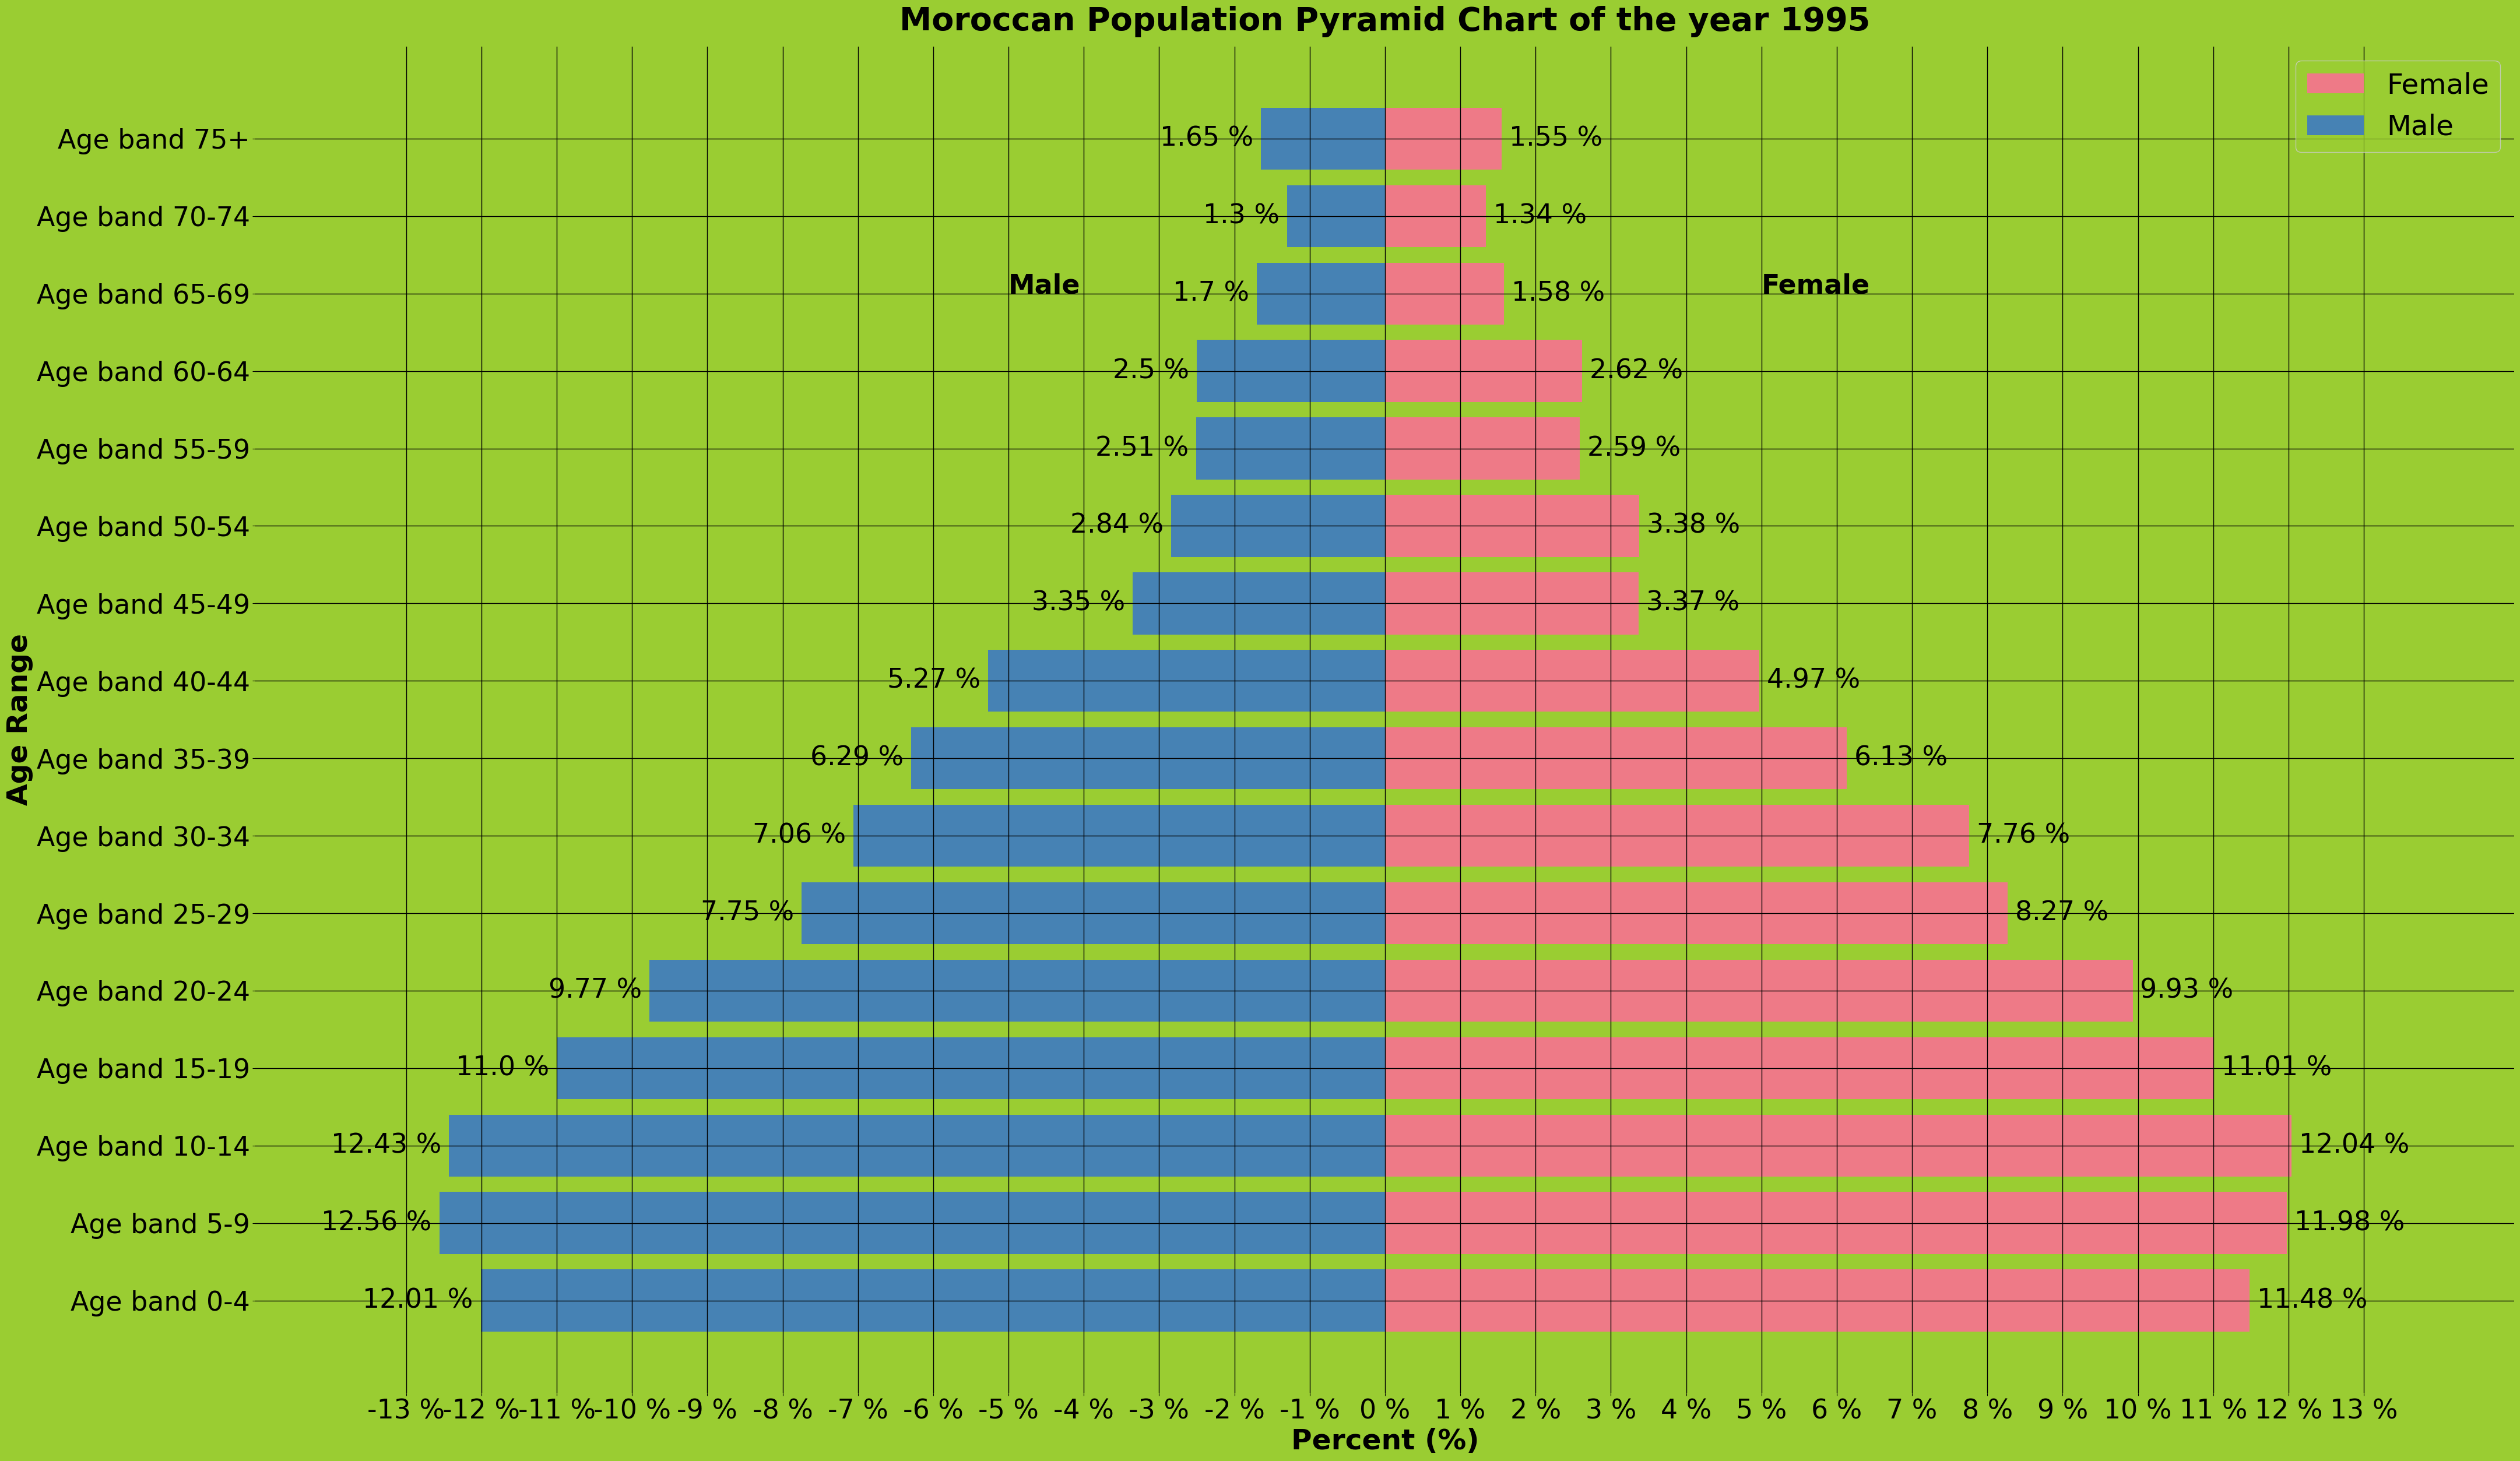

In [7]:
#set plot colors
female_color = "#ee7a87"
male_color = "#4682b4"

#set the figure size
fig_1995 = plt.figure(figsize=(50,30))


#create horizontal bar charts for the male and female population data
plt.barh(y=population_1995["Age"], width=population_1995["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=population_1995["Age"], width=population_1995["Male_Width"], left=population_1995["Male_Left"],
         color="#4682b4", label="Male");

#Add the labels "Male" and "Female" to the chart
plt.text(-5, 13, "Male", fontsize=33, fontweight="bold");
plt.text(5, 13, "Female", fontsize=33, fontweight="bold");

#A for loop is used to add percentage labels for each age group to the chart
for idx in range(len(population_1995)):
    plt.text(x=population_1995["Male_Left"][idx]-0.1, y=idx, s="{} %".format(population_1995["Male"][idx]),
             ha="right", va="center",
             fontsize=33, color="black");
    plt.text(x=population_1995["Female_Width"][idx]+0.1, y=idx, s="{} %".format(population_1995["Female"][idx]),
             ha="left", va="center",
             fontsize=33, color="black");
    
#used to set the limits of the x-axis
plt.xlim(-15,15);

#specify the tick labels for the x-axis
plt.xticks(range(-13,14), ["{} %".format(i) for i in range(-13,14)]);

plt.xticks(fontsize=33)
plt.yticks(fontsize=33)

plt.legend(loc="best",fontsize=35);

#Add label and title
plt.xlabel("Percent (%)", fontsize=35, fontweight="bold")
plt.ylabel("Age Range", fontsize=35, fontweight="bold")
plt.title("Moroccan Population Pyramid Chart of the year 1995", loc="center", pad=20, fontsize=40, fontweight="bold");

**It is evident that in 1995, Morocco's population pyramid exhibited a robust structure, characterized by a substantial young population and a strong workforce.**

## **Year 2011:**

* **Preparing the data:**

In [48]:
#construct distribution vector for Male Population for 2011
male_2011 = [round((value / sum(Male_Pop.iloc[-1][1:])) * 100,2) for value in Male_Pop.iloc[-1][1:]]
print(sum(male_2011))

#construct distribution vector for Female Population for 2011
female_2011 = [round((value / sum(Female_Pop.iloc[-1][1:])) * 100,2) for value in Female_Pop.iloc[-1][1:]]
print(sum(female_2011))

#join age_band with male and female distribution for the year 2011
population_2011 = pd.DataFrame({"Age": age_band, "Male": male_2011, "Female": female_2011})

#Manipulating Data for Pyramid construction
population_2011["Female_Left"] = 0
population_2011["Female_Width"] = population_2011["Female"]

population_2011["Male_Left"] = -population_2011["Male"]
population_2011["Male_Width"] = population_2011["Male"]

population_2011

99.98
100.00000000000001


,Age,Male,Female,Female_Left,Female_Width,Male_Left,Male_Width
0,Age band 0-4,9.27,8.75,0,8.75,-9.27,9.27
1,Age band 5-9,9.08,8.60,0,8.60,-9.08,9.08
2,Age band 10-14,9.37,8.94,0,8.94,-9.37,9.37
3,Age band 15-19,10.06,9.57,0,9.57,-10.06,10.06
4,Age band 20-24,9.84,9.58,0,9.58,-9.84,9.84
5,Age band 25-29,9.11,9.20,0,9.20,-9.11,9.11
6,Age band 30-34,7.84,8.20,0,8.20,-7.84,7.84
7,Age band 35-39,6.66,7.15,0,7.15,-6.66,6.66
8,Age band 40-44,5.72,6.22,0,6.22,-5.72,5.72
9,Age band 45-49,5.53,5.92,0,5.92,-5.53,5.53


* **Plotting the Pyramid:**

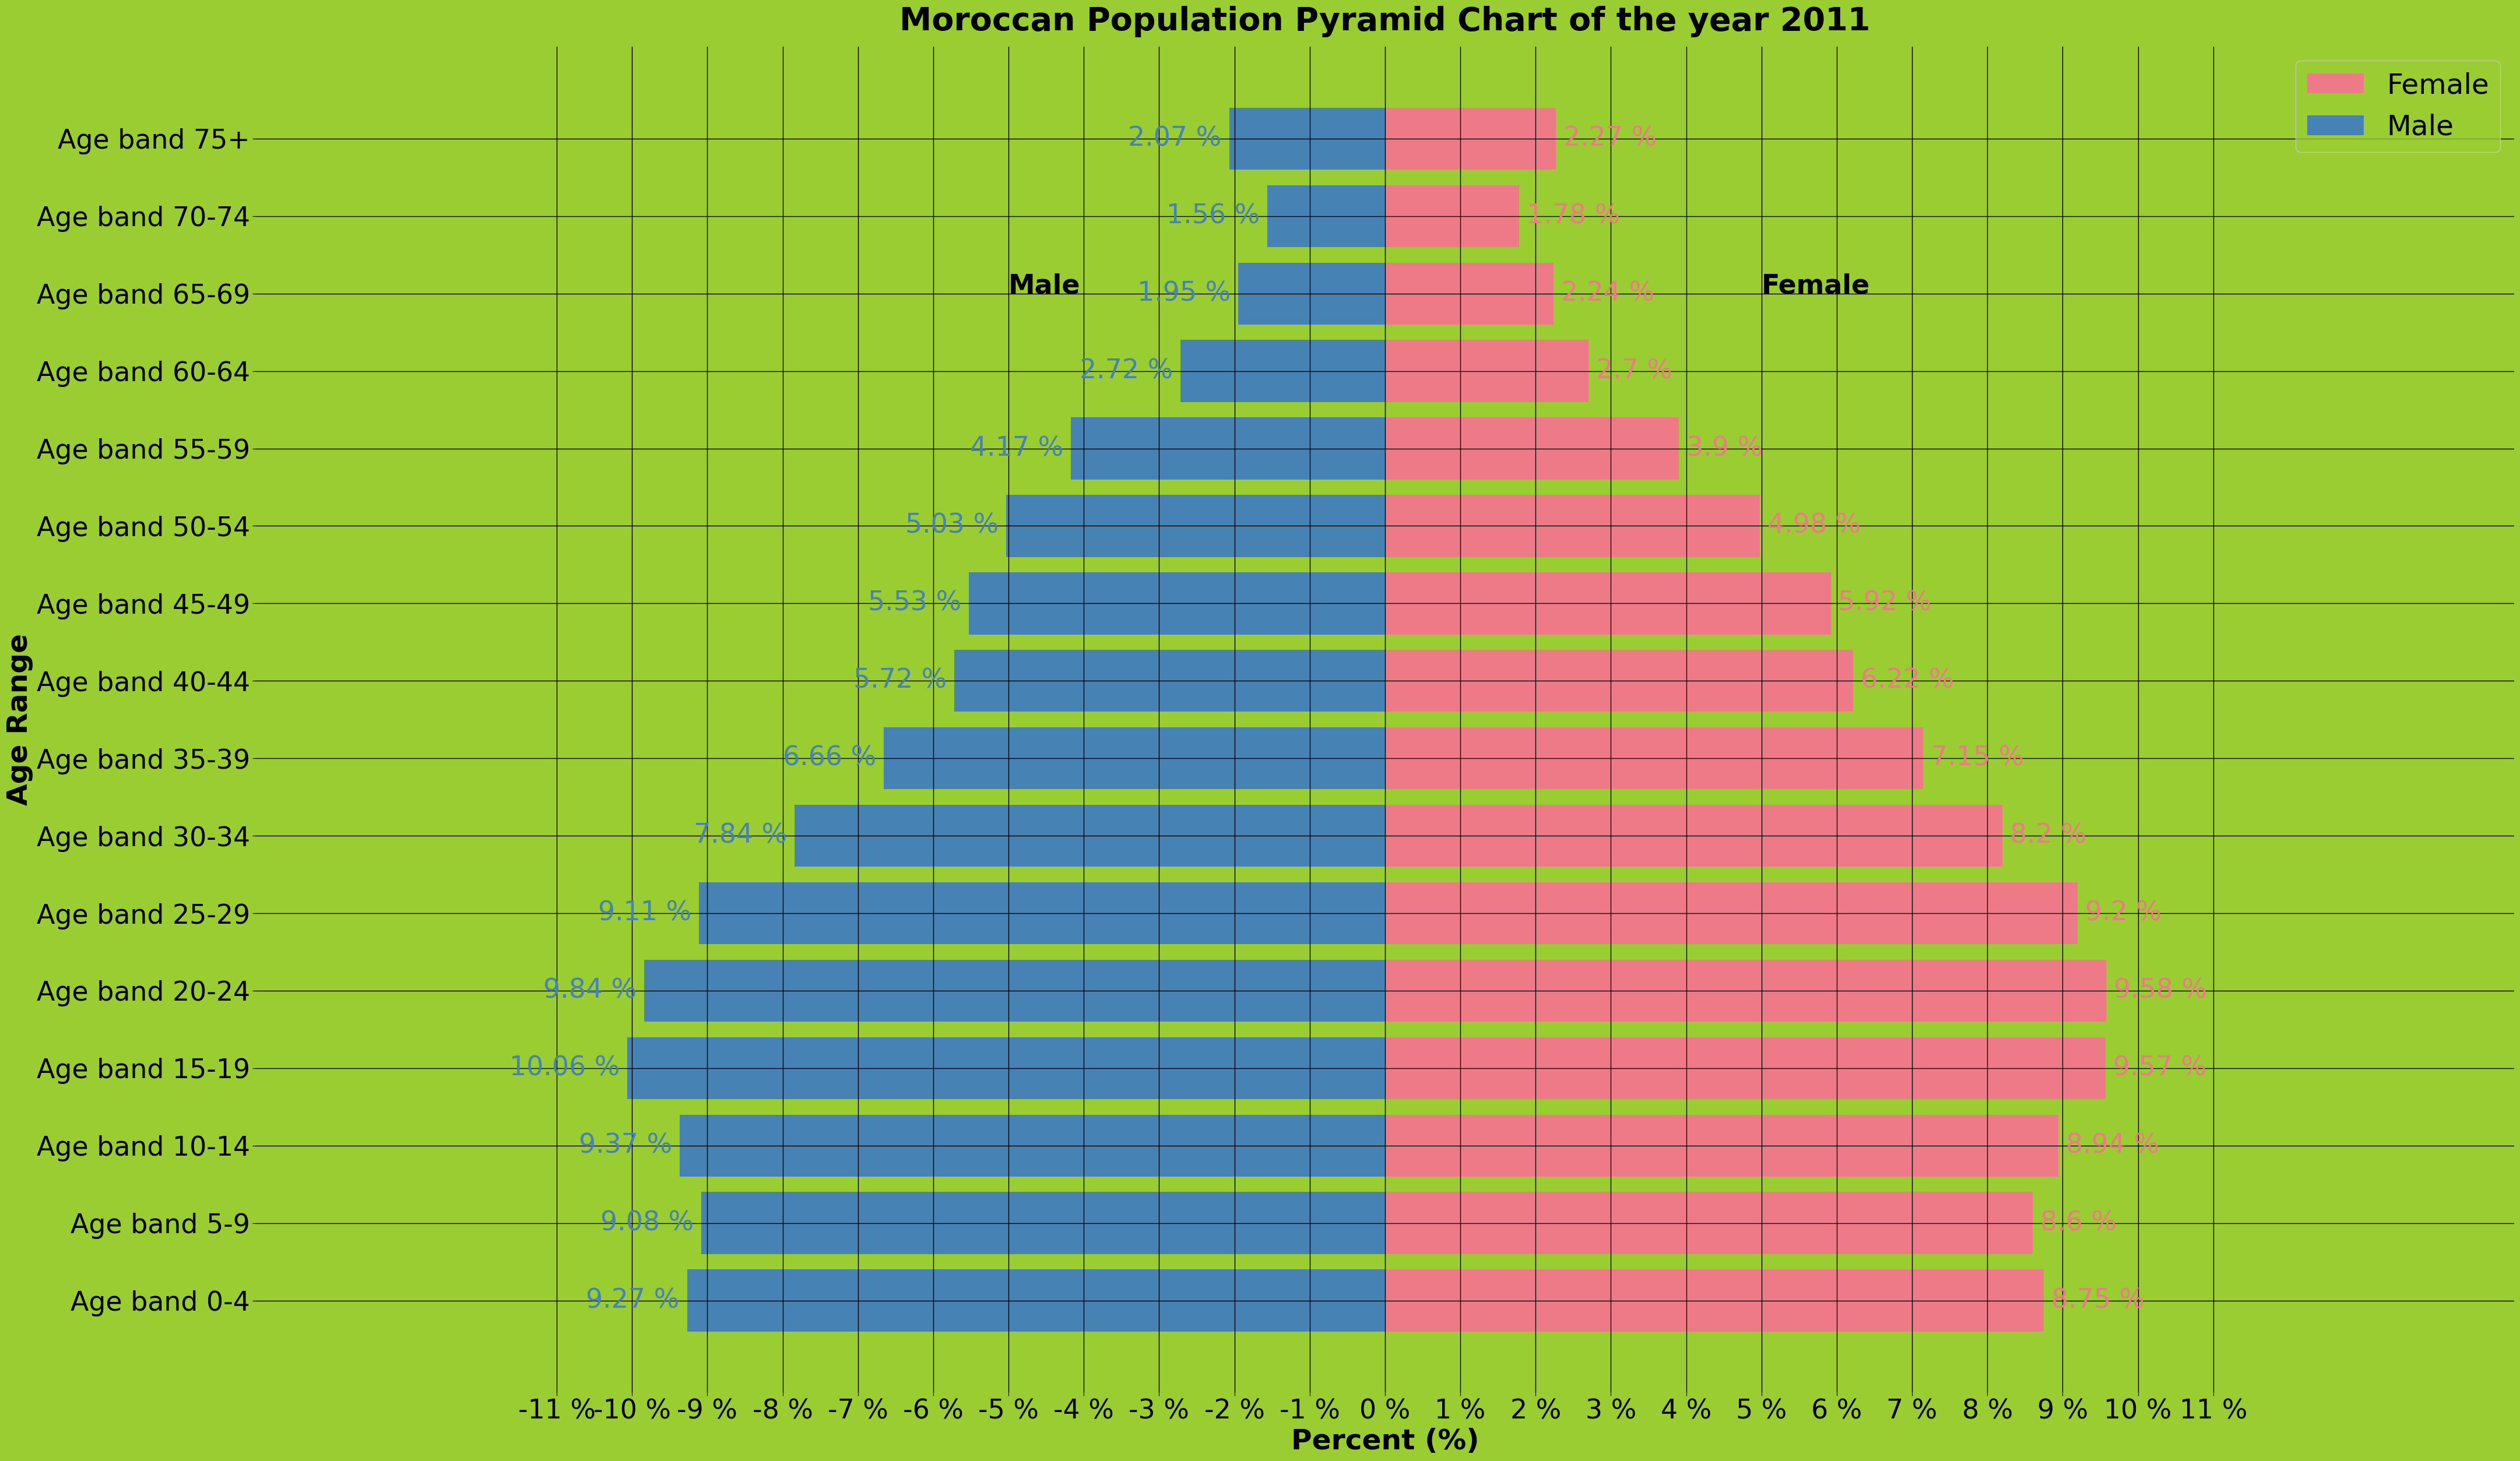

In [9]:
#set plot colors
female_color = "#ee7a87"
male_color = "#4682b4"

#set the figure size
fig_2011 = plt.figure(figsize=(50,30))

#create horizontal bar charts for the male and female population data
plt.barh(y=population_2011["Age"], width=population_2011["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=population_2011["Age"], width=population_2011["Male_Width"], left=population_2011["Male_Left"],
         color="#4682b4", label="Male");

#Add the labels "Male" and "Female" to the chart
plt.text(-5, 13, "Male", fontsize=33, fontweight="bold");
plt.text(5, 13, "Female", fontsize=33, fontweight="bold");

#A for loop is used to add percentage labels for each age group to the chart
for idx in range(len(population_2011)):
    plt.text(x=population_2011["Male_Left"][idx]-0.1, y=idx, s="{} %".format(population_2011["Male"][idx]),
             ha="right", va="center",
             fontsize=33, color="#4682b4");
    plt.text(x=population_2011["Female_Width"][idx]+0.1, y=idx, s="{} %".format(population_2011["Female"][idx]),
             ha="left", va="center",
             fontsize=33, color="#ee7a87");

#used to set the limits of the x-axis
plt.xlim(-15,15);

#specify the tick labels for the x-axis
plt.xticks(range(-11,12), ["{} %".format(i) for i in range(-11,12)]);

plt.xticks(fontsize=33)
plt.yticks(fontsize=33)

plt.legend(loc="best",fontsize=35);

#Add label and title
plt.xlabel("Percent (%)", fontsize=35, fontweight="bold")
plt.ylabel("Age Range", fontsize=35, fontweight="bold")
plt.title("Moroccan Population Pyramid Chart of the year 2011", loc="center", pad=20, fontsize=40, fontweight="bold");


**In 2011, we observed that the young population was smaller than in 1995, and the workforce was also reduced. This decline can be attributed to a decrease in the birth rate, which has consequently raised significant concerns within the Moroccan pension industry.**

<a id="3"></a>
# **Implementation with StatsForecast**

We are going to train the `AutoARIMA, model, using the `AutoARIMA` function. This model will help us forecast user demand in the next 39 yearly.

4.1. **Forecast of Male Population**

Let's prepare the training data:

In [10]:
#Make a copy of the Male population original data which is the Male training data
Male_Pop_train = Male_Pop.copy()

#convert year column from integer to Date type
Male_Pop_train["Year"]=pd.to_datetime(Male_Pop_train["Year"].astype(str) + '-01-01')

#set the index of the Male training data as the year column
#Male_Pop_train.set_index('Year', inplace=True)

Male_Pop_train.head()

,Year,Age band 0-4,Age band 5-9,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
0,1995-01-01,1577000,1649000,1632000,1444000,1282000,1017000,927000,826000,692000,440000,373000,330000,328000,223000,171000,216000
1,1996-01-01,1550000,1645000,1643000,1488000,1312000,1069000,931000,851000,722000,488000,369000,337000,322000,245000,164000,221000
2,1997-01-01,1529000,1636000,1647000,1534000,1337000,1129000,934000,875000,746000,543000,367000,345000,315000,266000,160000,225000
3,1998-01-01,1517000,1620000,1647000,1574000,1364000,1186000,945000,896000,768000,596000,374000,353000,308000,283000,162000,226000
4,1999-01-01,1521000,1588000,1646000,1605000,1397000,1235000,970000,911000,791000,642000,393000,357000,305000,293000,170000,225000


In [11]:
Male_Pop_train=Male_Pop_train.rename(columns={"Year": "ds"})

We are going to adapt our data set to be able to use it with `StatsForecast`.

In [12]:
data_male=pd.melt(Male_Pop_train, id_vars='ds', value_vars=['Age band 0-4', 'Age band 5-9', 'Age band 10-14',
       'Age band 15-19', 'Age band 20-24', 'Age band 25-29', 'Age band 30-34',
       'Age band 35-39', 'Age band 40-44', 'Age band 45-49', 'Age band 50-54',
       'Age band 55-59', 'Age band 60-64', 'Age band 65-69', 'Age band 70-74',
       'Age band 75+'], var_name='Subject', value_name='score').sort_values(["ds"])

data_male=data_male.rename(columns={"Subject": "unique_id", "score":"y"})
data_male.head(17)

,ds,unique_id,y
0,1995-01-01,Age band 0-4,1577000
238,1995-01-01,Age band 70-74,171000
221,1995-01-01,Age band 65-69,223000
204,1995-01-01,Age band 60-64,328000
187,1995-01-01,Age band 55-59,330000
170,1995-01-01,Age band 50-54,373000
153,1995-01-01,Age band 45-49,440000
136,1995-01-01,Age band 40-44,692000
119,1995-01-01,Age band 35-39,826000
102,1995-01-01,Age band 30-34,927000


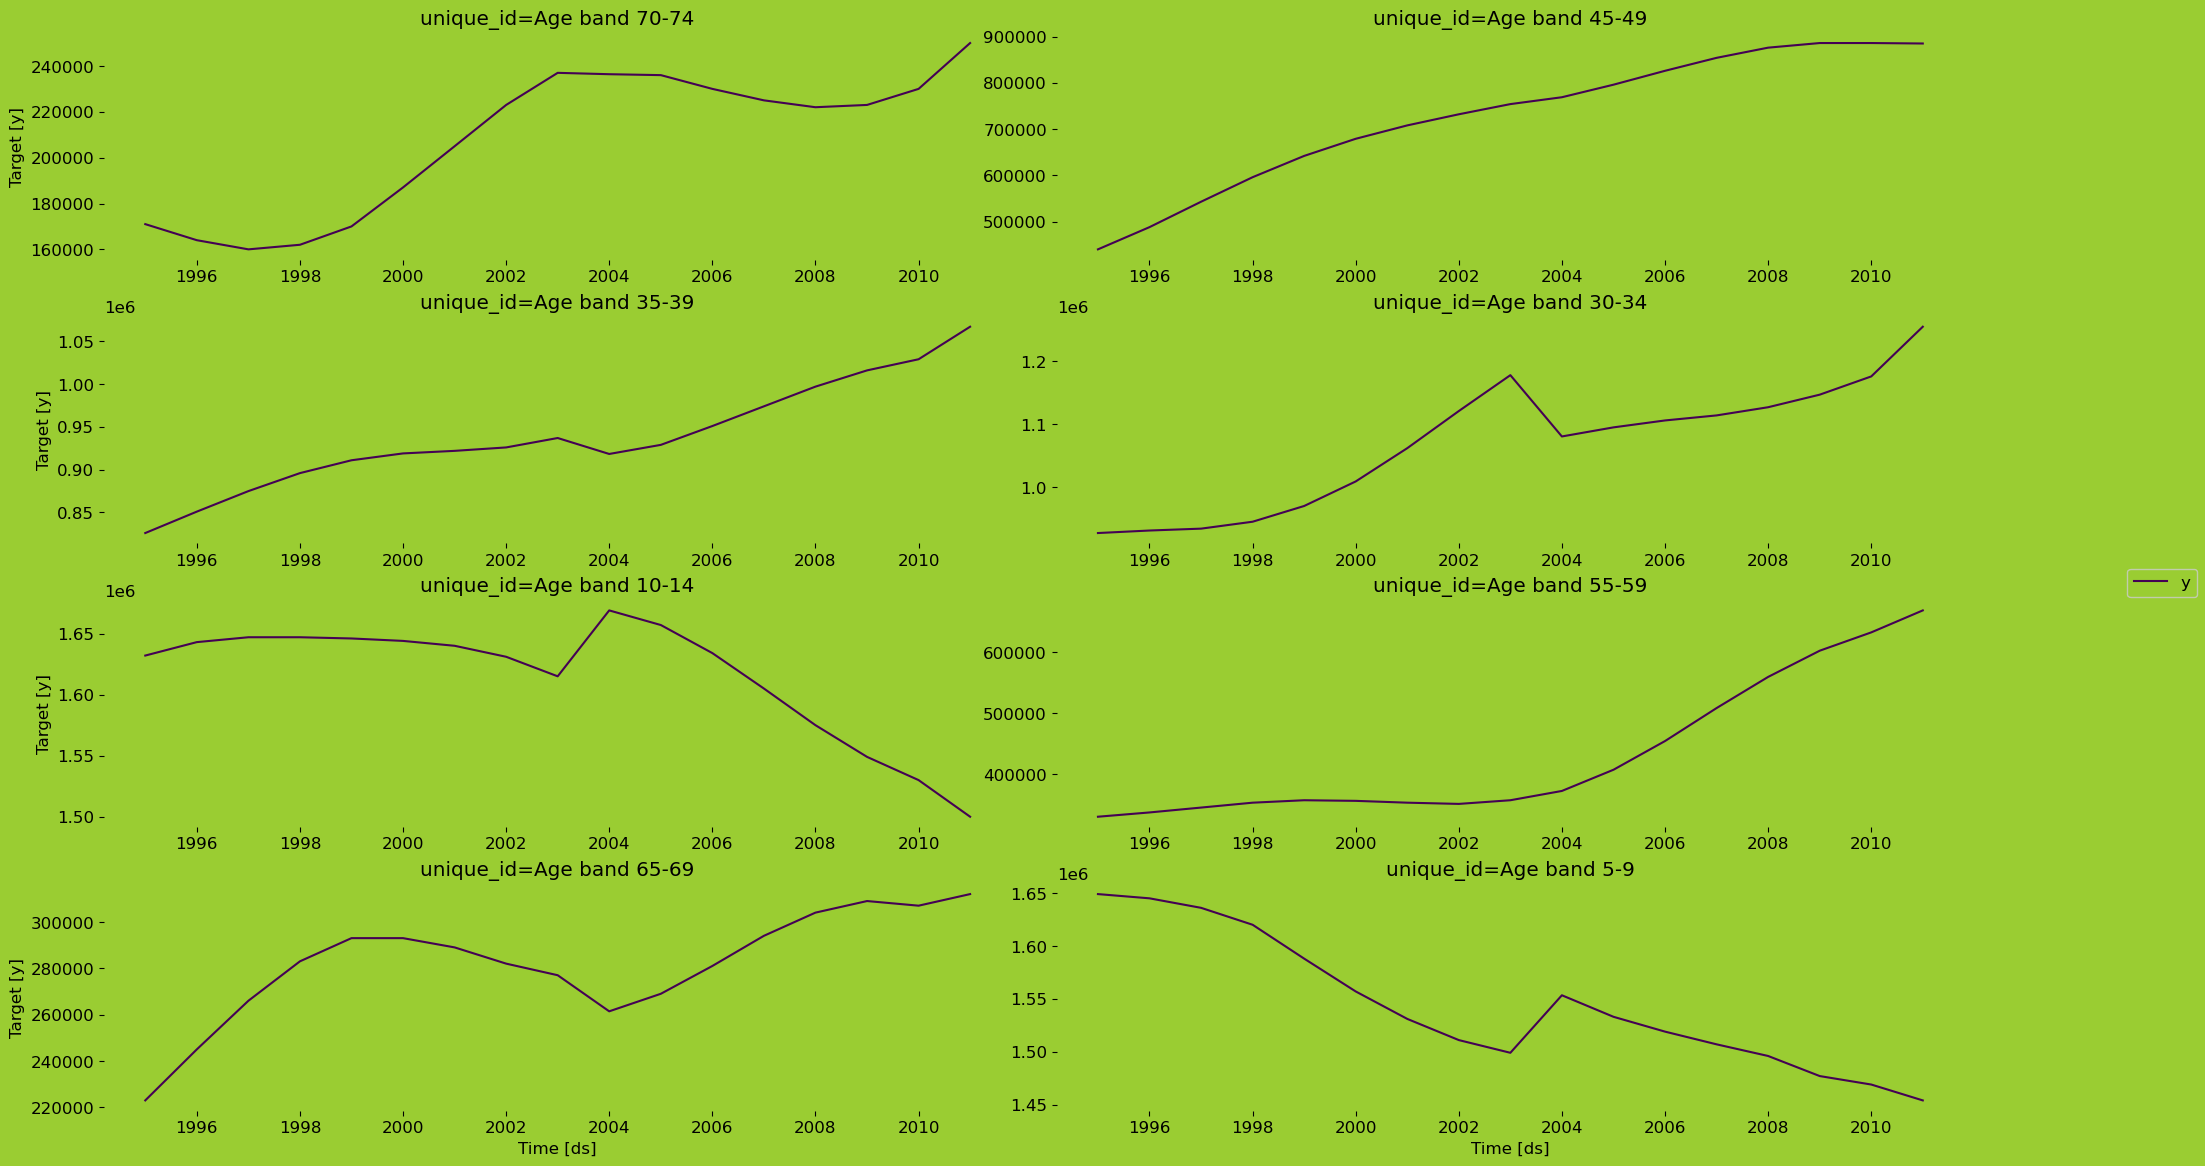

In [13]:
plot_series(data_male)

**Let's forecast:**

In [14]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA,  SeasonalNaive,  MSTL, AutoETS,AutoCES, AutoTheta, SeasonalExponentialSmoothingOptimized,Holt, HoltWinters

In [15]:
season_length = 1 # Yearly data 
horizon = 39 # number of predictions

# We call the model that we are going to use
models_male = [AutoARIMA(season_length=season_length)]

In [16]:
# Instantiate StatsForecast class as sf
sf_male = StatsForecast(
    df=data_male,
    models=models_male,
    freq='YS', 
    n_jobs=-1)

## **Fit the Model**

In [17]:
sf_male.fit()

StatsForecast(models=[AutoARIMA])

## **Predict Method**

**Let's forecast:**

In [19]:
Y_hat_male = sf_male.predict(horizon)
forecast_male=Y_hat_male.reset_index()
Y_hat_male

,ds,AutoARIMA
unique_id,,
Age band 0-4,2012-01-01,1488544.000
Age band 0-4,2013-01-01,1490608.750
Age band 0-4,2014-01-01,1491547.000
Age band 0-4,2015-01-01,1491973.375
Age band 0-4,2016-01-01,1492167.125
...,...,...
Age band 75+,2046-01-01,332000.000
Age band 75+,2047-01-01,332000.000
Age band 75+,2048-01-01,332000.000


In [20]:
Male_Pop_train.set_index("ds", inplace=True)

In [22]:
forecasted_data_male=forecast_male.pivot(index='ds', columns='unique_id', values='AutoARIMA')
forecasted_data_male.head()


unique_id,Age band 0-4,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 5-9,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
ds,,,,,,,,,,,,,,,,
2012-01-01,1488544.000,1477050.5,1593707.875,1576000.0,1459000.0,1255000.0,1092119.500,950000.0,883570.6250,1454000.0,8.531958e+05,707355.5000,509379.65625,314895.8125,274540.96875,332000.0
2013-01-01,1490608.750,1454101.0,1585626.375,1576000.0,1459000.0,1255000.0,1108724.500,984000.0,881956.9375,1454000.0,8.996359e+05,748587.5625,595892.06250,316572.9375,297845.43750,332000.0
2014-01-01,1491547.000,1431151.5,1581849.500,1576000.0,1459000.0,1255000.0,1119701.000,1018000.0,880264.0625,1454000.0,9.409100e+05,790869.0625,692328.00000,317544.2500,316664.90625,332000.0
2015-01-01,1491973.375,1408202.0,1580084.250,1576000.0,1459000.0,1255000.0,1126956.875,1052000.0,878537.2500,1454000.0,9.746924e+05,833737.5000,796262.56250,318106.8125,329782.28125,332000.0
2016-01-01,1492167.125,1385252.5,1579259.375,1576000.0,1459000.0,1255000.0,1131753.375,1086000.0,876795.8125,1454000.0,1.000237e+06,876934.1875,905863.37500,318432.6250,337388.12500,332000.0


In [24]:
forecasted_data_male.columns = Male_Pop_train.columns 

#Combine Male training data with Male Forecasted data
Combined_Male_Pop = pd.concat([Male_Pop_train, forecasted_data_male], axis=0)
Combined_Male_Pop.tail()

,Age band 0-4,Age band 5-9,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
ds,,,,,,,,,,,,,,,,
2046-01-01,1492328.375,696767.625,1578535.5,1576000.0,1459000.0,1255000.0,1141107.375,2106000.0,824231.6250,1454000.0,1.011931e+06,2184800.25,4665366.0,318881.0,328401.15625,332000.0
2047-01-01,1492328.375,673818.125,1578535.5,1576000.0,1459000.0,1255000.0,1141107.375,2140000.0,822479.1875,1454000.0,1.011903e+06,2228413.50,4792485.5,318881.0,328404.90625,332000.0
2048-01-01,1492328.375,650868.625,1578535.5,1576000.0,1459000.0,1255000.0,1141107.375,2174000.0,820726.8125,1454000.0,1.011879e+06,2272026.75,4919605.5,318881.0,328407.62500,332000.0
2049-01-01,1492328.375,627919.125,1578535.5,1576000.0,1459000.0,1255000.0,1141107.375,2208000.0,818974.3750,1454000.0,1.011859e+06,2315639.75,5046726.0,318881.0,328409.31250,332000.0
2050-01-01,1492328.375,604969.625,1578535.5,1576000.0,1459000.0,1255000.0,1141107.375,2242000.0,817221.9375,1454000.0,1.011845e+06,2359253.00,5173847.5,318881.0,328410.06250,332000.0


4.2. **Forecast of Female Population**

Let's prepare the training data:

In [25]:
#Make a copy of the Female population original data which is also the Female training data
Female_Pop_train = Female_Pop.copy()

#convert year column from integer to Date type
Female_Pop_train["Year"]=pd.to_datetime(Female_Pop_train["Year"].astype(str) + '-01-01')

#set the index of the Female training data as the year column
#Female_Pop_train.set_index('Year', inplace=True)

Female_Pop_train=Female_Pop_train.rename(columns={"Year": "ds"})
Female_Pop_train.head()

,ds,Age band 0-4,Age band 5-9,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
0,1995-01-01,1522000,1588000,1596000,1460000,1317000,1096000,1029000,813000,659000,447000,448000,343000,348000,210000,178000,205000
1,1996-01-01,1495000,1582000,1600000,1495000,1345000,1138000,1035000,865000,683000,486000,435000,369000,337000,244000,162000,220000
2,1997-01-01,1473000,1574000,1598000,1529000,1369000,1187000,1036000,920000,703000,534000,418000,399000,323000,278000,151000,230000
3,1998-01-01,1459000,1560000,1594000,1558000,1394000,1234000,1042000,967000,728000,581000,409000,424000,314000,307000,149000,236000
4,1999-01-01,1458000,1534000,1589000,1579000,1422000,1276000,1059000,1002000,761000,621000,415000,437000,315000,324000,159000,238000


In [26]:
data_female=pd.melt(Female_Pop_train, id_vars='ds', value_vars=['Age band 0-4', 'Age band 5-9', 'Age band 10-14',
       'Age band 15-19', 'Age band 20-24', 'Age band 25-29', 'Age band 30-34',
       'Age band 35-39', 'Age band 40-44', 'Age band 45-49', 'Age band 50-54',
       'Age band 55-59', 'Age band 60-64', 'Age band 65-69', 'Age band 70-74',
       'Age band 75+'], var_name='Subject', value_name='score').sort_values(["ds"])

data_female=data_female.rename(columns={"Subject": "unique_id", "score":"y"})
data_female.head(17)

,ds,unique_id,y
0,1995-01-01,Age band 0-4,1522000
238,1995-01-01,Age band 70-74,178000
221,1995-01-01,Age band 65-69,210000
204,1995-01-01,Age band 60-64,348000
187,1995-01-01,Age band 55-59,343000
170,1995-01-01,Age band 50-54,448000
153,1995-01-01,Age band 45-49,447000
136,1995-01-01,Age band 40-44,659000
119,1995-01-01,Age band 35-39,813000
102,1995-01-01,Age band 30-34,1029000


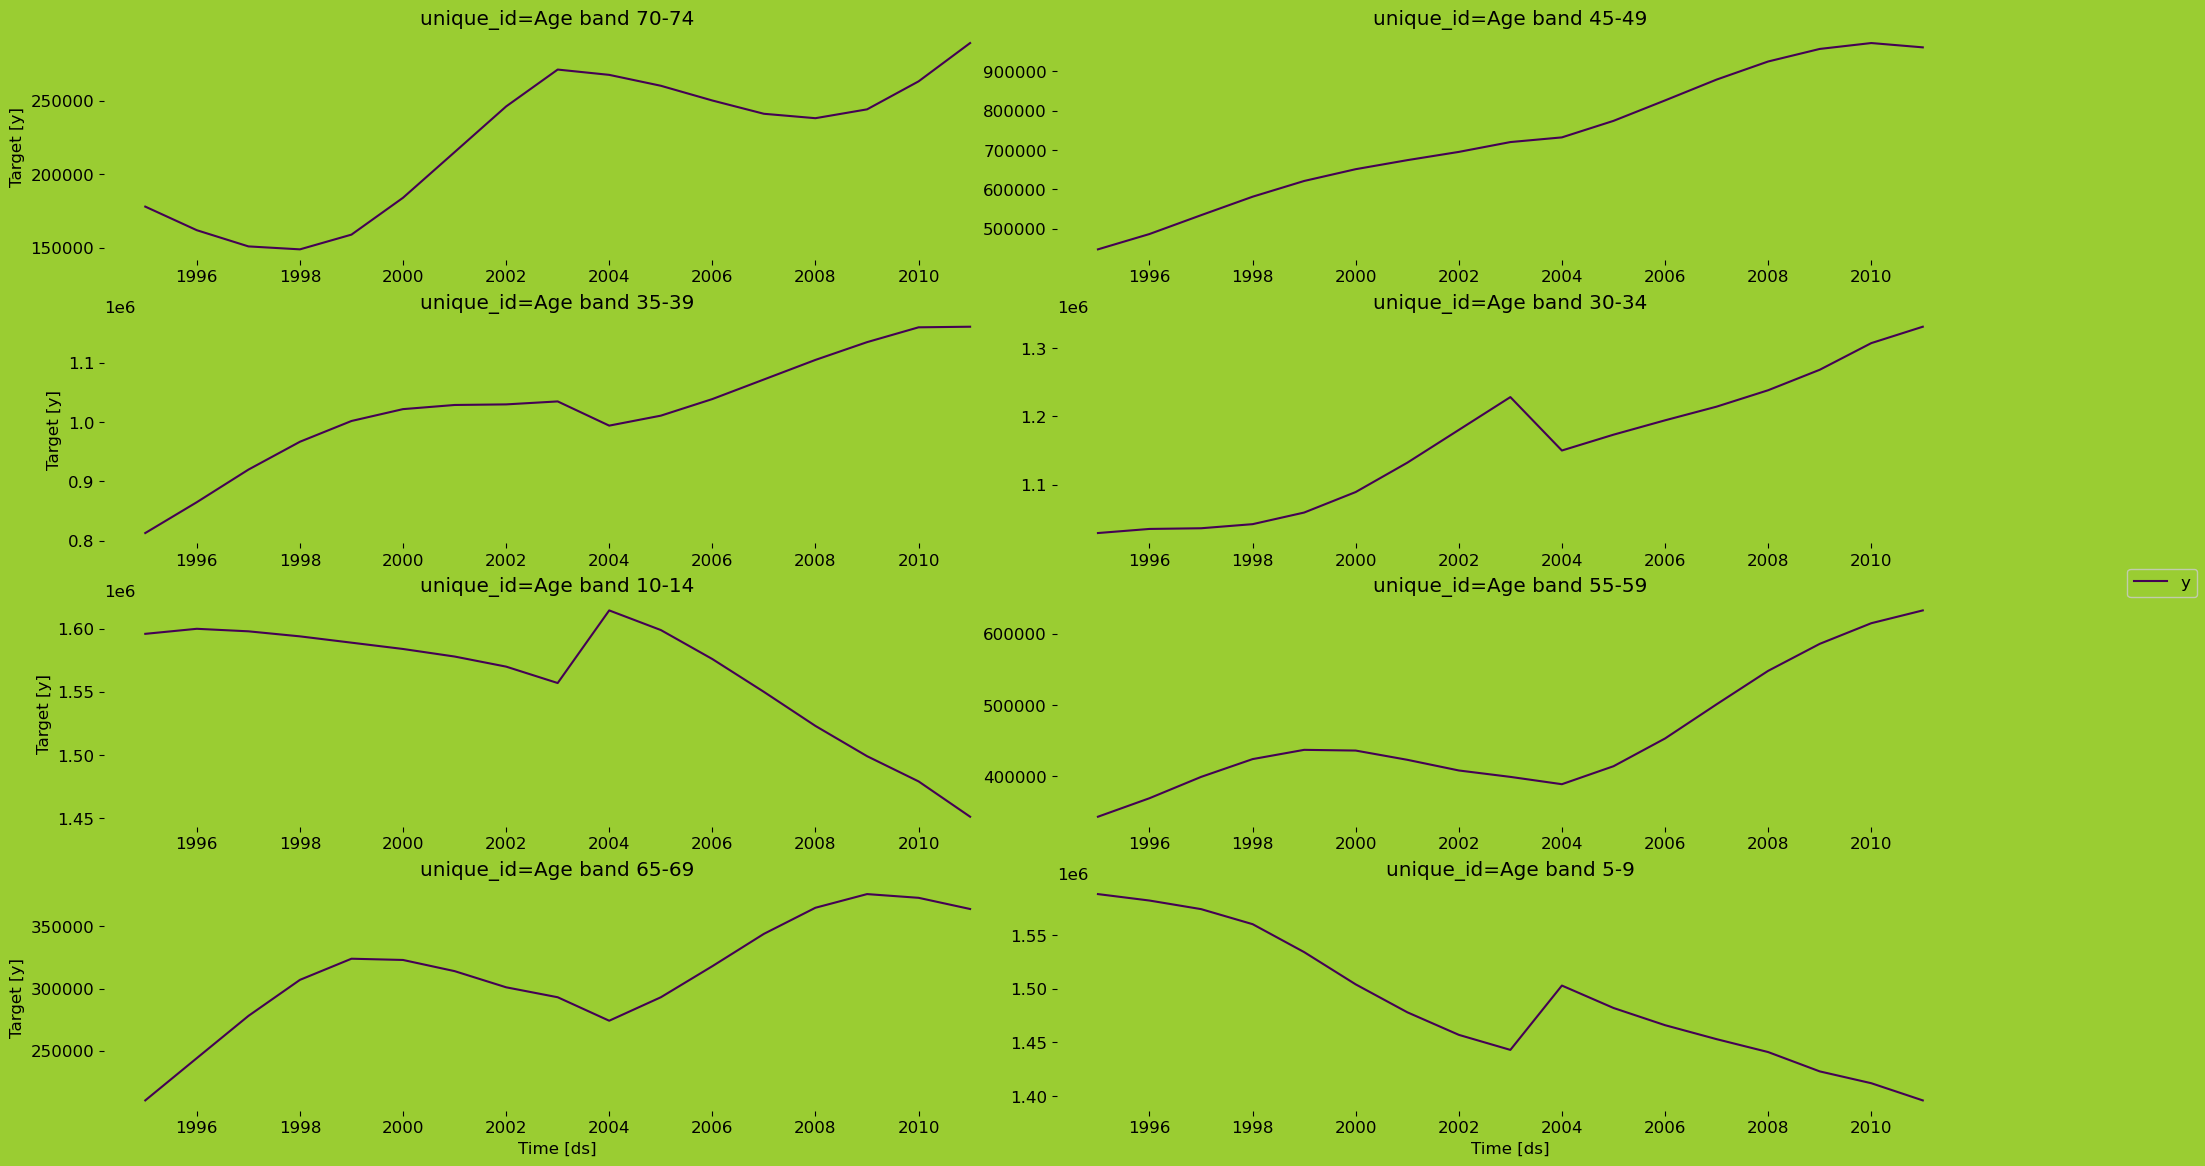

In [37]:
plot_series(data_female)

**Let's forecast:**

In [27]:
season_length = 1 # Yearly data 
horizon = 39 # number of predictions

# We call the model that we are going to use
models_female = [AutoARIMA(season_length=season_length)]

In [28]:
# Instantiate StatsForecast class as sf
sf_female = StatsForecast(
    df=data_female,
    models=models_female,
    freq='YS', 
    n_jobs=-1)

## **Fit the Model**

In [29]:
sf_female.fit()

StatsForecast(models=[AutoARIMA])

## **Predict Method**

In [30]:
Y_hat_female = sf_female.predict(horizon)
forecast_female=Y_hat_female.reset_index()
Y_hat_female

,ds,AutoARIMA
unique_id,,
Age band 0-4,2012-01-01,1.430385e+06
Age band 0-4,2013-01-01,1.435567e+06
Age band 0-4,2014-01-01,1.438427e+06
Age band 0-4,2015-01-01,1.440006e+06
Age band 0-4,2016-01-01,1.440878e+06
...,...,...
Age band 75+,2046-01-01,3.714839e+05
Age band 75+,2047-01-01,3.714839e+05
Age band 75+,2048-01-01,3.714839e+05


In [31]:
forecasted_data_female=forecast_female.pivot(index='ds', columns='unique_id', values='AutoARIMA')
forecasted_data_female.head()

unique_id,Age band 0-4,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 5-9,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
ds,,,,,,,,,,,,,,,,
2012-01-01,1430385.250,1451000.0,1502066.000,1557935.25,1493000.0,1331000.0,1161606.125,1016000.0,942123.5625,1396000.0,8.541244e+05,645942.4375,478142.75000,358475.34375,314937.40625,370532.37500
2013-01-01,1435566.625,1451000.0,1439042.000,1559870.50,1493000.0,1331000.0,1161973.625,1023000.0,923969.1875,1396000.0,9.008808e+05,656559.5625,509076.84375,355084.06250,336349.96875,371119.40625
2014-01-01,1438427.125,1451000.0,1366844.625,1561805.75,1493000.0,1331000.0,1162196.375,1030000.0,909724.6250,1396000.0,9.479927e+05,666107.5000,528526.87500,353002.31250,351194.09375,371344.31250
2015-01-01,1440006.250,1451000.0,1287686.750,1563741.00,1493000.0,1331000.0,1162331.375,1037000.0,899843.5000,1396000.0,9.953042e+05,675163.9375,536959.37500,351724.43750,359311.21875,371430.43750
2016-01-01,1440878.125,1451000.0,1203247.500,1565676.25,1493000.0,1331000.0,1162413.250,1044000.0,893629.1875,1396000.0,1.042728e+06,683994.3125,536989.12500,350940.00000,361764.28125,371463.46875


In [32]:
Female_Pop_train.set_index("ds", inplace=True)

In [49]:
forecasted_data_female.columns = Female_Pop_train.columns 

#Combine Female training data with Female Forecasted data
Combined_Female_Pop = pd.concat([Female_Pop_train, forecasted_data_female], axis=0)
Combined_Female_Pop.tail()

,Age band 0-4,Age band 5-9,Age band 10-14,Age band 15-19,Age band 20-24,Age band 25-29,Age band 30-34,Age band 35-39,Age band 40-44,Age band 45-49,Age band 50-54,Age band 55-59,Age band 60-64,Age band 65-69,Age band 70-74,Age band 75+
ds,,,,,,,,,,,,,,,,
2046-01-01,1441952.625,1451000.0,-1776025.25,1623733.625,1493000.0,1331000.0,1162539.25,1254000.0,887915.375,1396000.0,2469586.75,943299.0000,513210.28125,349693.03125,343782.43750,371483.9375
2047-01-01,1441952.625,1451000.0,-1877072.25,1625668.875,1493000.0,1331000.0,1162539.25,1261000.0,887915.375,1396000.0,2517154.75,951937.0000,513204.90625,349693.03125,343783.50000,371483.9375
2048-01-01,1441952.625,1451000.0,-1978120.00,1627604.125,1493000.0,1331000.0,1162539.25,1268000.0,887915.375,1396000.0,2564723.00,960575.0625,513201.43750,349693.03125,343781.40625,371483.9375
2049-01-01,1441952.625,1451000.0,-2079168.25,1629539.375,1493000.0,1331000.0,1162539.25,1275000.0,887915.375,1396000.0,2612291.00,969213.0625,513199.81250,349693.03125,343777.65625,371483.9375
2050-01-01,1441952.625,1451000.0,-2180217.00,1631474.625,1493000.0,1331000.0,1162539.25,1282000.0,887915.375,1396000.0,2659859.25,977851.1250,513199.65625,349693.03125,343773.53125,371483.9375


## **Population Pyramid of the forecasted year 2050**

In [34]:
#Construct Male distribution vector of the year 2050
male_2050 = [round((value / sum(Combined_Male_Pop.iloc[-1])) * 100,2) for value in Combined_Male_Pop.iloc[-1]]

#Construct Female distribution vector of the year 2050
female_2050 = [round((value / sum(Combined_Female_Pop.iloc[-1])) * 100,2) for value in Combined_Female_Pop.iloc[-1]]

#Verify that the sum of eac vector is 100%
print(sum(female_2050))
print(sum(female_2050))

#Manipulating Data for Pyramid construction
population_2050 = pd.DataFrame({"Age": age_band, "Male": male_2050, "Female": female_2050})

population_2050["Female_Left"] = 0
population_2050["Female_Width"] = population_2050["Female"]

population_2050["Male_Left"] = -population_2050["Male"]
population_2050["Male_Width"] = population_2050["Male"]


100.0
100.0


* **Let's plot!**

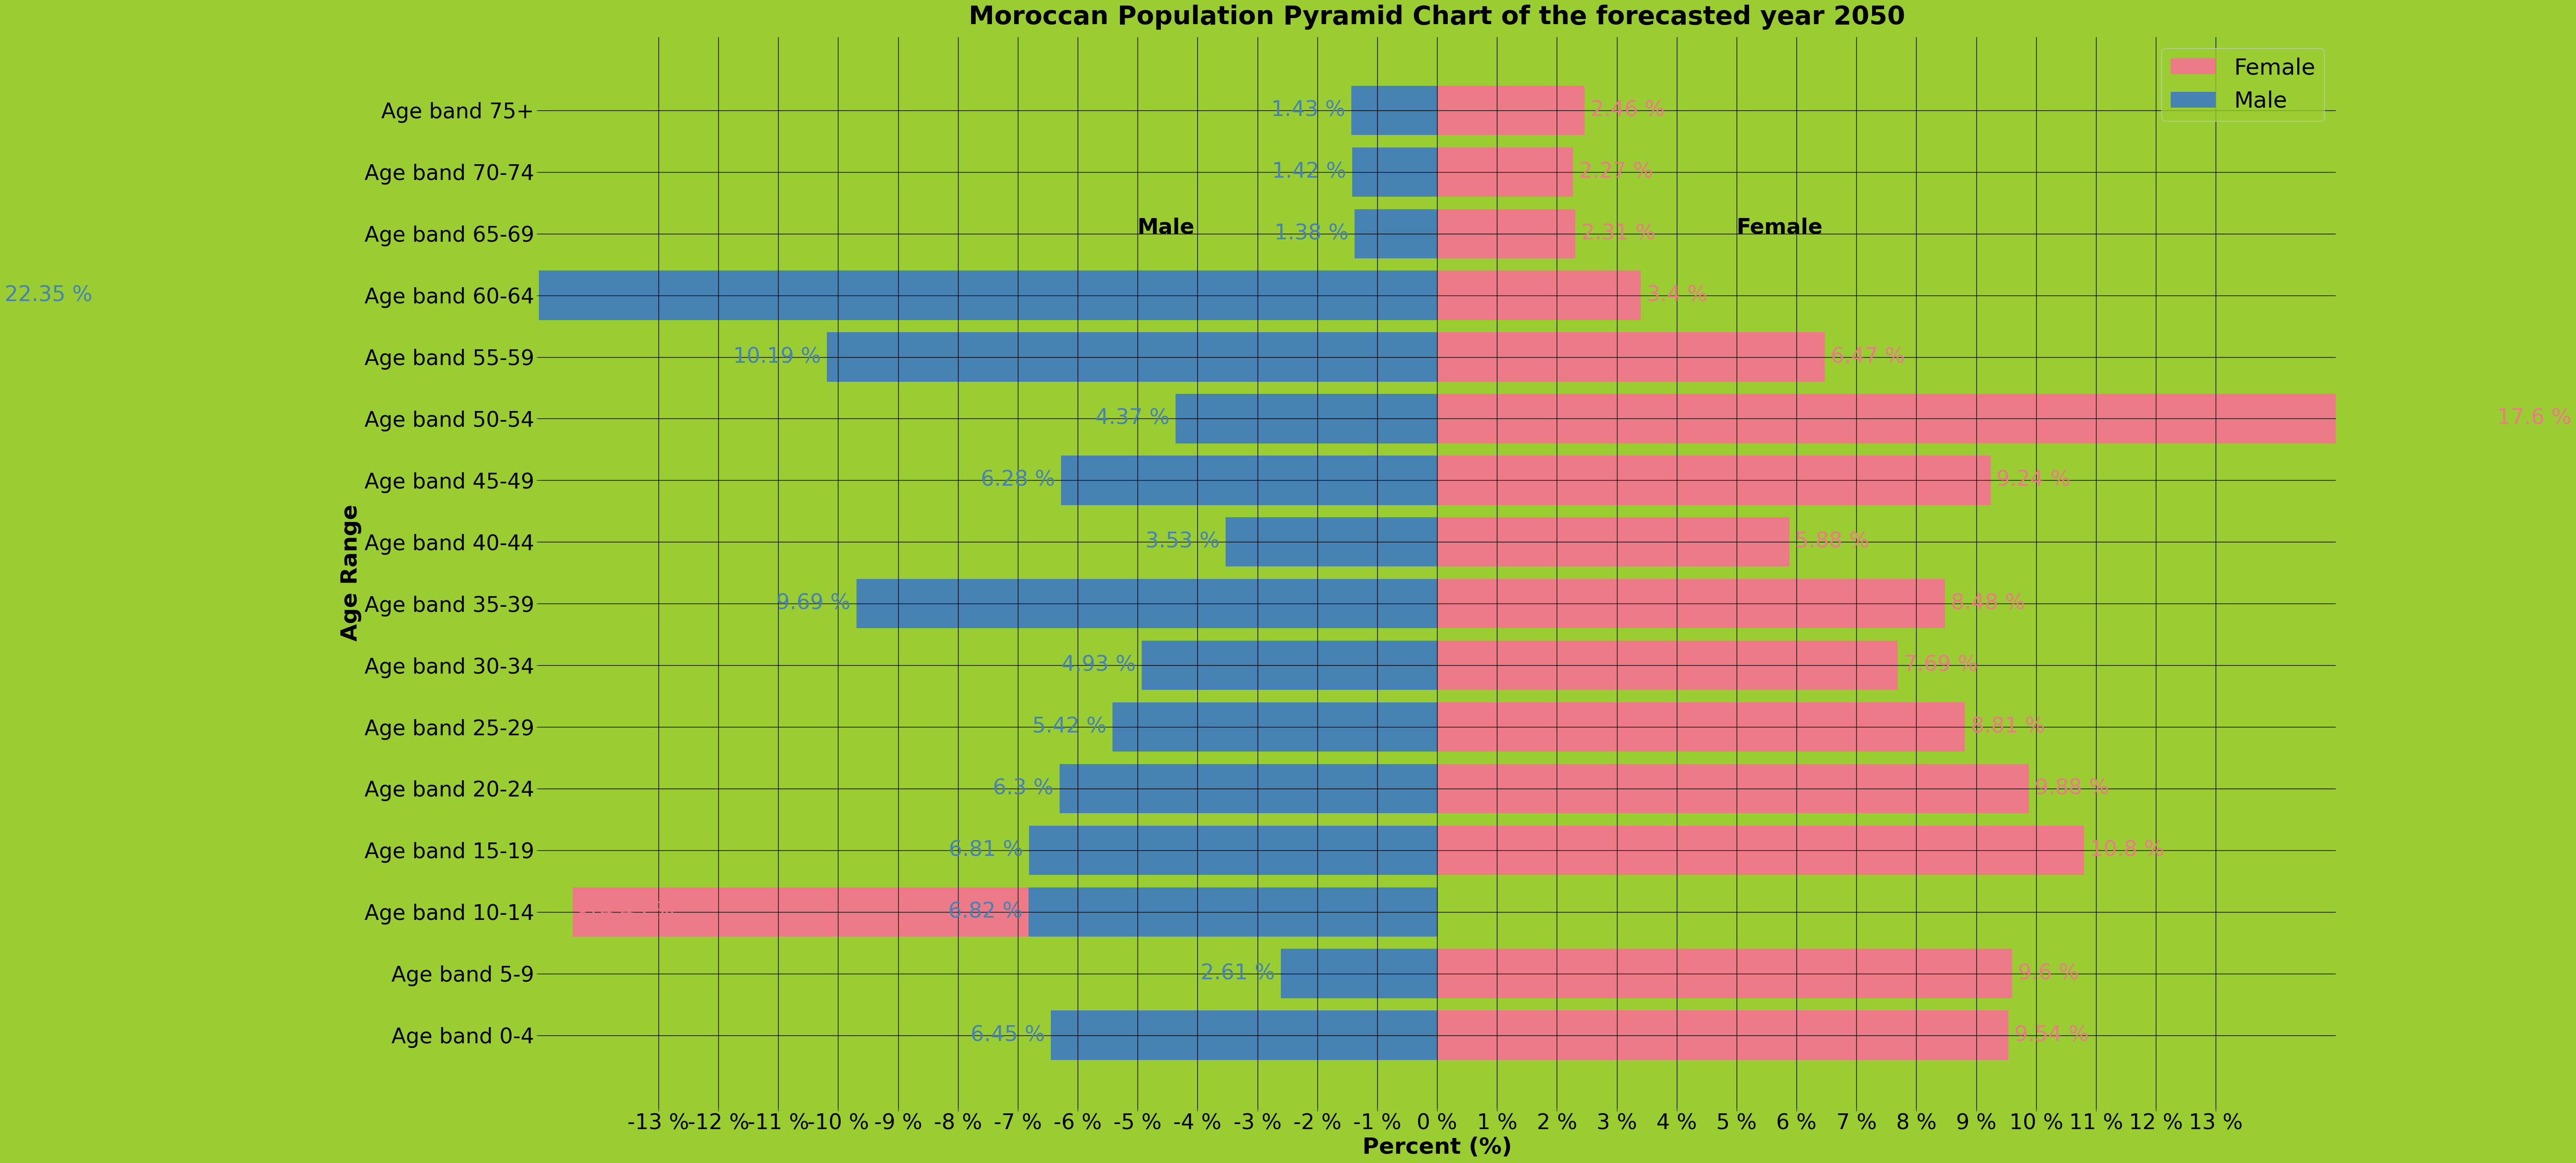

In [36]:
#set plot colors
female_color = "#ee7a87"
male_color = "#4682b4"

#set figure size
fig_2050 = plt.figure(figsize=(50,30))

#create horizontal bar charts for the male and female population data
plt.barh(y=population_2050["Age"], width=population_2050["Female_Width"], color="#ee7a87", label="Female");
plt.barh(y=population_2050["Age"], width=population_2050["Male_Width"], left=population_2050["Male_Left"],
         color="#4682b4", label="Male");

#Add the labels "Male" and "Female" to the chart
plt.text(-5, 13, "Male", fontsize=33, fontweight="bold");
plt.text(5, 13, "Female", fontsize=33, fontweight="bold");

#for loop is then used to add percentage labels for each age group to the chart
for idx in range(len(population_2050)):
    plt.text(x=population_2050["Male_Left"][idx]-0.1, y=idx, s="{} %".format(population_2050["Male"][idx]),
             ha="right", va="center",
             fontsize=33, color="#4682b4");
    plt.text(x=population_2050["Female_Width"][idx]+0.1, y=idx, s="{} %".format(population_2050["Female"][idx]),
             ha="left", va="center",
             fontsize=33, color="#ee7a87");

#set the limits of the x-axis
plt.xlim(-15,15);

#specify the tick labels for the x-axis
plt.xticks(range(-13,14), ["{} %".format(i) for i in range(-13,14)]);

plt.xticks(fontsize=33)
plt.yticks(fontsize=33)

plt.legend(loc="best",fontsize=35);

#add labels and a title to the chart
plt.xlabel("Percent (%)", fontsize=35, fontweight="bold")
plt.ylabel("Age Range", fontsize=35, fontweight="bold")
plt.title("Moroccan Population Pyramid Chart of the forecasted year 2050", loc="center", pad=20, fontsize=40, fontweight="bold");

**By the year 2050, if no solution is presented to address the issue of declining young population, it is likely that we will observe a rapid aging of the Moroccan population. The government might be compelled to import a significant number of young immigrants, particularly from sub-Saharan Africa. This would be necessary to offset the pronounced demand for a workforce and to ensure the sustainability of the pension system.**

<a id="6"></a>
# **References**

1. [Arima Model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Automatic Forecasting](https://nixtla.github.io/statsforecast/src/core/models.html)
4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)